In [75]:
import tensorflow as tf
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from matplotlib import pyplot as plt

In [100]:
NUM_NEURON = 50
NUM_FEATURES = 7


keep_prob = 0.8
learning_rate = 10**-4
beta = 10**-3

epochs = 1500
batch_size = 8

df = pd.read_csv("data/admission_predict.csv")
df = df.drop(['Serial No.'], axis=1)

y = df['Chance of Admit'].to_numpy()
y = np.reshape(y, (y.shape[0], 1))

#Optimized one 
features = df.drop(["Chance of Admit"], axis=1).to_numpy()

In [101]:
def neural_net(x):
    #hidden layer 1
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1) #activation function
    layer_1 = tf.nn.dropout(layer_1, rate=(1-keep_prob))
    
    #hidden layer 2
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2) #activation function
    layer_2 = tf.nn.dropout(layer_2, rate=(1-keep_prob))

    
    #hidden layer 3
#     layer_3 = tf.add(tf.matmul(x, weights['h3']), biases['b3'])
#     layer_3 = tf.nn.relu(layer_3) #activation function
    
    #linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return (out_layer)


weights = {
    'h1': tf.Variable(tf.random_normal([NUM_FEATURES, NUM_NEURON], seed=1337)),
    'h2': tf.Variable(tf.random_normal([NUM_NEURON, NUM_NEURON], seed=1337)),
    'out': tf.Variable(tf.random_normal([NUM_NEURON, 1], seed=1337))# 1 ouput label
}

biases = {
    'b1': tf.Variable(tf.random_normal([NUM_NEURON], seed=1337)),
    'b2': tf.Variable(tf.random_normal([NUM_NEURON], seed=1337)),
    'out': tf.Variable(tf.random_normal([1], seed=1337))
}

In [102]:
np.random.seed(1337)
tf.set_random_seed(1337)

#Create model
X = tf.placeholder(tf.float32, [None, NUM_FEATURES])
Y = tf.placeholder(tf.float32, [None, 1])


x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.3)
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#predicted value
Y_hat = neural_net(X)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
loss = tf.reduce_mean(tf.square(Y - Y_hat)) 
reg = tf.nn.l2_loss(weights['h1']) + tf.nn.l2_loss(weights['h2']) +  tf.nn.l2_loss(weights['out'])
train_op = optimizer.minimize(loss + reg * beta)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    batch_train_err = []
    test_err = []
    for i in range(epochs):

        #Batch training
        #pick random batch_size data points from x_train
        rand_index = np.random.choice(x_train.shape[0], size=batch_size)
        x_batch = x_train[rand_index]
        y_batch = y_train[rand_index]

        train_op.run(feed_dict={X:x_batch, Y:y_batch})
      

        if(i%10==0):
            batch_train_err.append(loss.eval(feed_dict={X: x_batch, Y: y_batch}))
            test_err.append(loss.eval(feed_dict={X: x_test, Y: y_test}))   
            print ("epoch %d: train err %g, test error %g " % (i, batch_train_err[-1], test_err[-1]))
        


epoch 0: train err 74083, test error 35058 
epoch 10: train err 874.927, test error 2119.97 
epoch 20: train err 328.057, test error 564.665 
epoch 30: train err 562.665, test error 510.347 
epoch 40: train err 239.614, test error 360.606 
epoch 50: train err 307.419, test error 269.562 
epoch 60: train err 278.231, test error 186.322 
epoch 70: train err 283.145, test error 233.589 
epoch 80: train err 95.5976, test error 247.17 
epoch 90: train err 511.908, test error 223.166 
epoch 100: train err 129.371, test error 180.74 
epoch 110: train err 265.917, test error 170.686 
epoch 120: train err 390.933, test error 140.817 
epoch 130: train err 101.537, test error 140.919 
epoch 140: train err 211.318, test error 116.944 
epoch 150: train err 86.9514, test error 122.601 
epoch 160: train err 49.4967, test error 133.089 
epoch 170: train err 203.291, test error 98.9036 
epoch 180: train err 72.6033, test error 87.8786 
epoch 190: train err 211.276, test error 73.8266 
epoch 200: train 

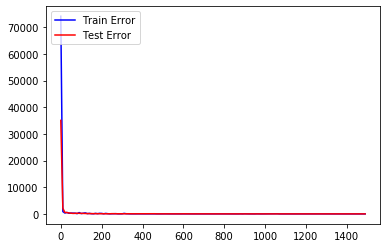

In [103]:
#Q1a plot train err against test err
plt.plot(range(0, epochs, 10), batch_train_err, color='blue', label='Train Error')
plt.plot(range(0, epochs, 10), test_err, color ='red', label='Test Error')
plt.legend(loc='upper left')
